<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_CNN_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as tf  # 학습할때 필요한 토치들을 여러형태로 바꿔줄수있다. 
from torch.utils.data import DataLoader, Dataset  # 데이터 배치사이즈 조정
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
import torch
import torchvision
import torchvision.transforms as tf
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
# transforms
train_transf = tf.Compose([
                           tf.RandomCrop(32),
                           tf.RandomAffine(degrees=3),
                           tf.ToTensor(),
                           tf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transf = tf.Compose([
                          tf.ToTensor(),
                          tf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
train_transf = tf.Compose([
                     tf.RandomAffine(degrees=3),
                     tf.ToTensor(),
                     tf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
test_transf = tf.Compose([
                          tf.ToTensor(),
                          tf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
transf = tf.Compose([
                     tf.ToTensor(),
                     tf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# 데이터 불러오기 
# 다른곳에서 데이터를 불러올때는 따로 Class 만들어서 불러오기
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transf)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transf)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transf)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transf)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_set[0][0]  # image

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [ ]:
train_set[0][1]  # lable

6

In [ ]:
train_set[0][0].shape  # 채널 3개 8*8사이즈

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


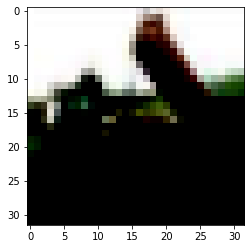

In [ ]:
img = train_set[2][0].numpy()
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


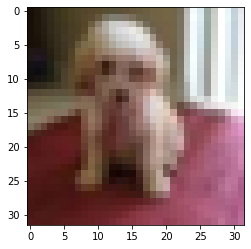

In [ ]:
def custom_imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))  # 이미지크기 -> 채널 순으로 바꾸기
    plt.show()

 

def process():
    for batch_idx, (inputs, targets) in enumerate(train_dl):
        custom_imshow(inputs[0])
        break

process()

In [ ]:
# 모델 만들기(Custom)
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)  # ==> flatten()
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


  # 원래는 이 자리에 transforms집어넣어야함 

net = Net()
print(net)

Net(
  (conv1): Conv2d(2, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16*5*5, out_features = 120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)  
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)  ## classes가 10개이기때문

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
net.to(device)
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# DataLoader 사용 모델 돌리기 전에 데이터 셋 준비
train_dl = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=2)
test_dl = DataLoader(test_set, batch_size=8, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
train_dl = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=2)
test_dl = DataLoader(test_set, batch_size=8, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
for x,y in train_dl:
  print(x.shape)
  print(y.shape)
  break 
# 배치사이즈 8, 채널 3개, 32*32크기의 이미지

torch.Size([8, 3, 32, 32])
torch.Size([8])


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # momentum ==> 속도(?)

In [ ]:
for epoch in range(5):
  running_loss = 0.0
  net.train()
  for i, data in enumerate(train_dl, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    optimizer.zero_grad()

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss = loss.item()

    if i % 2000 == 1999:
      print(f'epoch{epoch+1}, loss:{running_loss}')

  with torch.no_grad():
    net.eval()
    correct, total=0, 0
    for images, labels in test_dl:
      images, labels = images.to(device), labels.to(device)
      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print(f'{epoch+1}epoch Val Accuracy:{100*correct/total}%')



epoch1, loss:1.8523128032684326
epoch1, loss:1.1082526445388794
epoch1, loss:0.9003583788871765
1epoch Val Accuracy:52.13%
epoch2, loss:1.4025157690048218
epoch2, loss:1.3520389795303345
epoch2, loss:0.6463478207588196
2epoch Val Accuracy:54.79%
epoch3, loss:1.6448726654052734
epoch3, loss:0.7909791469573975
epoch3, loss:1.2029054164886475
3epoch Val Accuracy:59.13%
epoch4, loss:0.8945367336273193
epoch4, loss:0.9018144607543945
epoch4, loss:1.7237244844436646
4epoch Val Accuracy:60.37%
epoch5, loss:1.6356837749481201
epoch5, loss:0.5191423296928406
epoch5, loss:0.24466899037361145
5epoch Val Accuracy:60.97%


In [ ]:
for epoch in range(5):
  running_loss = 0.0
  net.train()
  for i, data in enumerate(train_dl, 0):
    input, labels = data
    optimizer.zero_grad()
    outputs = net(input)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[epoch:%d, %5d] loss:%.3f' %(epoch+1, i+1, running_loss / 2000))
      running_loss=0.0
  with torch.no_grad():
    net.eval()
    correct = 0
    total = 0
    for data in test_dl:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)  # == argmax() 가장 큰 자리값을 구하겠다.
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print('%d% Epochs Val Accuracy:%d%%' %(epoch+1, 100*correct/total))
print('Finisihed')

[epoch:1,  2000] loss:2.304
[epoch:1,  4000] loss:2.305
[epoch:1,  6000] loss:2.304


TypeError: ignored

In [ ]:
with torch.no_grad():
  net.eval()
  correct = 0
  total = 0
  for data in test_dl:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # == argmax() 가장 큰 자리값을 구하겠다.
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Val Accuracy:%d%%' %(100*correct/total))
print('Finisihed')

Val Accuracy:62%
Finisihed


In [ ]:
# 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# 불러오기
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
class MyDataSet(torch.utils.data.Dataset):
    def __init__(self, images, labels, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms
        self.len = len(labels)
                    
    def __len__(self):
        return len
    
    def __getitem__(self, index):  # 데이터를 튜플형태로 내보낸다(getitem)
        data = self.X[index], self.y[index] # gets the row
        # reshape the row into the image size 
        # (numpy arrays have the color channels dim last)
        data = np.array(data).astype(np.uint8).reshape(28, 28, 1) 
        
        # perform transforms if there are any
        if self.transforms:
            data = self.transforms(data)
        
        # if !test_set return the label as well, otherwise don't
        if self.y is not None: # train/val
            return (data, self.y[i])
        else: # test
            return data

class ToTensor:  ## data 받기
  def __call__(self, data):
    x_data, y_data = data
    x_data = torch.FloatTensor(x_data)  # x_data 변환
    x_data = x.data.permute(2,0,1)  # x_data 채널수와 이미지 사이즈 순서 변환
    return x_data, torch.LongTensor(y_data)  # y_data LongTensor로 변환